## Prediction of Tennis Match Results using K-Nearest Neighbours Classification Model

## Introduction

ATP (Association of Tennis Professionals) and WTA (Women's Tennis Association) rankings are based on the points earned by players in ATP or WTA-certified events over the preceding 52-weeks. Each player or team has a maximum of one bounce after the ball has been hit by their opponent to return the ball over the net and within the boundaries of the court. When a player then fails to return the ball into the correct court, the opponent wins a point. The aim of tennis is to win enough points to win a game, enough games to win a set, and enough sets to win a match. Each tennis match includes best-of-three tiebreak sets and each set has at least 6 games. Whoever starts serving continues to serve until that game is over. Games are scored starting from 0 to 40, then game point, which wins the game (United States Tennis Association, n.d.).

Our project will answer whether a professional tennis player will win or lose the match based on age, rank, and first-serve points won. The dataset we are using contains 8614 rows of data from tennis matches for top 500 players from 2017 to 2019. The dataset includes the tournament's ID, name, level, date and draw size, and the match number, score and time. Also has winners and losers ID, seed, name, age, height, hand used, country, rank, rank points, and their aces, serve points, break points faced and saved in the match. Age of players is calculated when they’re in the match and reported in decimals. Rank is based on the player’s ATP/WTA rank as of the tournament date. First-serve points won are recorded directly from the match listed in this dataset. We will omit all rows with n/a after selecting our predictors to remove all incomplete records from our analysis and ensure missing data does not disrupt our analysis.


## Methods & Results

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [34]:
set.seed(123)

# Reading and Wrangling Data

data_2017 <- read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv")
data_2018 <- read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv")
data_2019 <- read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv")


atp_data <- rbind(data_2017,data_2018,data_2019) |>
  select(winner_age, loser_age, winner_rank, loser_rank, w_1stWon, l_1stWon) |> 
  na.omit()

win <- rep(c("win"), times = nrow(atp_data))
atp_data_win <- cbind(atp_data, win) |>
  select(win, winner_age, winner_rank, w_1stWon)
colnames(atp_data_win) <- c("result", "age","rank", "first_svpt_won")

lose <- rep(c("lose"), times = nrow(atp_data))
atp_data_lose <- cbind(atp_data, lose) |>
  select(lose, loser_age, loser_rank, l_1stWon)
colnames(atp_data_lose) <- c("result", "age","rank", "first_svpt_won")

data <- rbind(atp_data_win, atp_data_lose) |>
  mutate(result = as_factor(result))

# Splitting Dataset

data_split <- initial_split(data, prop = 0.75, strata = result)  
atp_train <- training(data_split)   
atp_test <- testing(data_split)

atp_train
atp_test  

Rows: 2911 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2806 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

,result,age,rank,first_svpt_won
,<fct>,<dbl>,<dbl>,<dbl>
8328,lose,21.2,100,33
8329,lose,20.4,141,39
8331,lose,33.6,34,27
8332,lose,20.7,160,23
8333,lose,24.1,26,29
8336,lose,25.7,78,33
8338,lose,17.8,351,14
8340,lose,30.8,29,39
8343,lose,34.7,21,42


,result,age,rank,first_svpt_won
,<fct>,<dbl>,<dbl>,<dbl>
5,win,22.7,79,26
8,win,34.9,39,42
20,win,26.0,3,30
22,win,27.0,5,18
24,win,26.0,3,50
28,win,32.9,98,51
35,win,31.7,96,28
36,win,32.8,86,20
40,win,28.7,14,26


#### Table 1: Means of the Predictor Variables

In [35]:
atp_train_wins <- filter(atp_train, result == "win")
atp_train_losses <- filter(atp_train, result == "lose")

atp_train_wins_averages <- atp_train_wins |>
                      mutate(average_age = mean(age)) |>
                      mutate(average_rank = mean(rank)) |>
                      mutate(average_first_svpt_won = mean(first_svpt_won)) |>
                      select(result, average_age, average_rank, average_first_svpt_won) |>
                      slice(1)

atp_train_losses_averages <- atp_train_losses |>
                      mutate(average_age = mean(age)) |>
                      mutate(average_rank = mean(rank)) |>
                      mutate(average_first_svpt_won = mean(first_svpt_won)) |>
                      select(result, average_age, average_rank, average_first_svpt_won) |>
                      slice(1)

atp_train_averages <- rbind(atp_train_wins_averages, atp_train_losses_averages)

atp_train_averages 

result,average_age,average_rank,average_first_svpt_won
<fct>,<dbl>,<dbl>,<dbl>
win,27.73483,69.33707,37.74347
lose,27.56069,105.25685,34.04243


#### Table 2: Number of Observations in Each Class

In [36]:
num_obs <- nrow(atp_train)

atp_train_results <- atp_train |>
                     group_by(result) |>
                     summarize(count = n(), percentage = n()/num_obs * 100)
atp_train_results 


result,count,percentage
<fct>,<int>,<dbl>
win,6245,50
lose,6245,50


#### Table 3: Rows of Missing Training Data 

In [37]:
atp_train_missing_rows <- data.frame(missing_rows = sum(is.na(atp_train)))

atp_train_missing_rows

missing_rows
<int>
0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



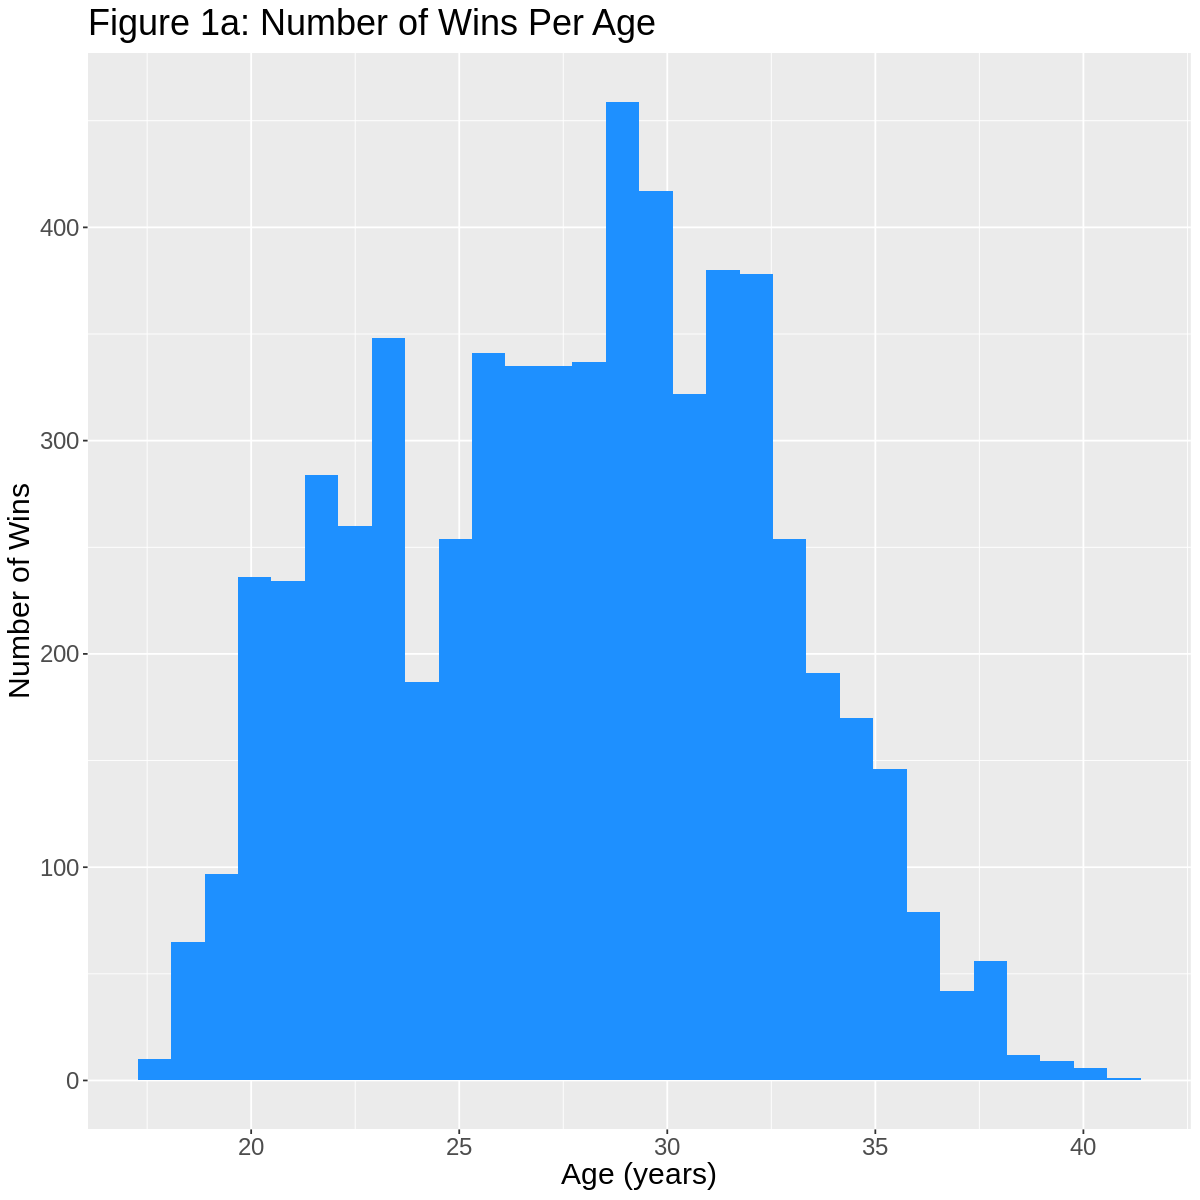

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 307 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


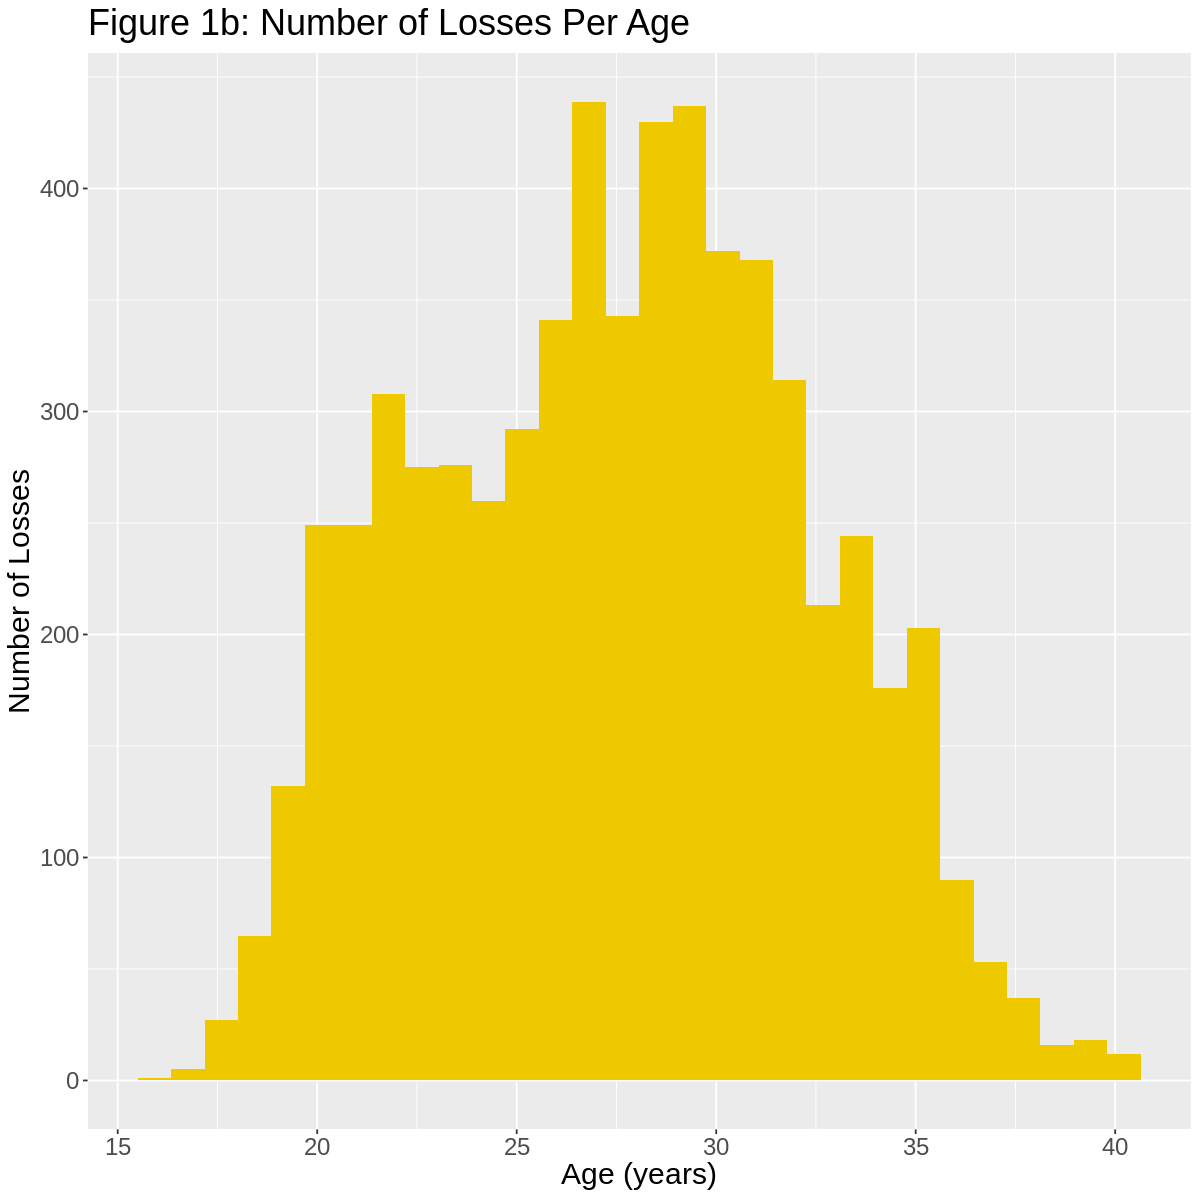

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 608 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


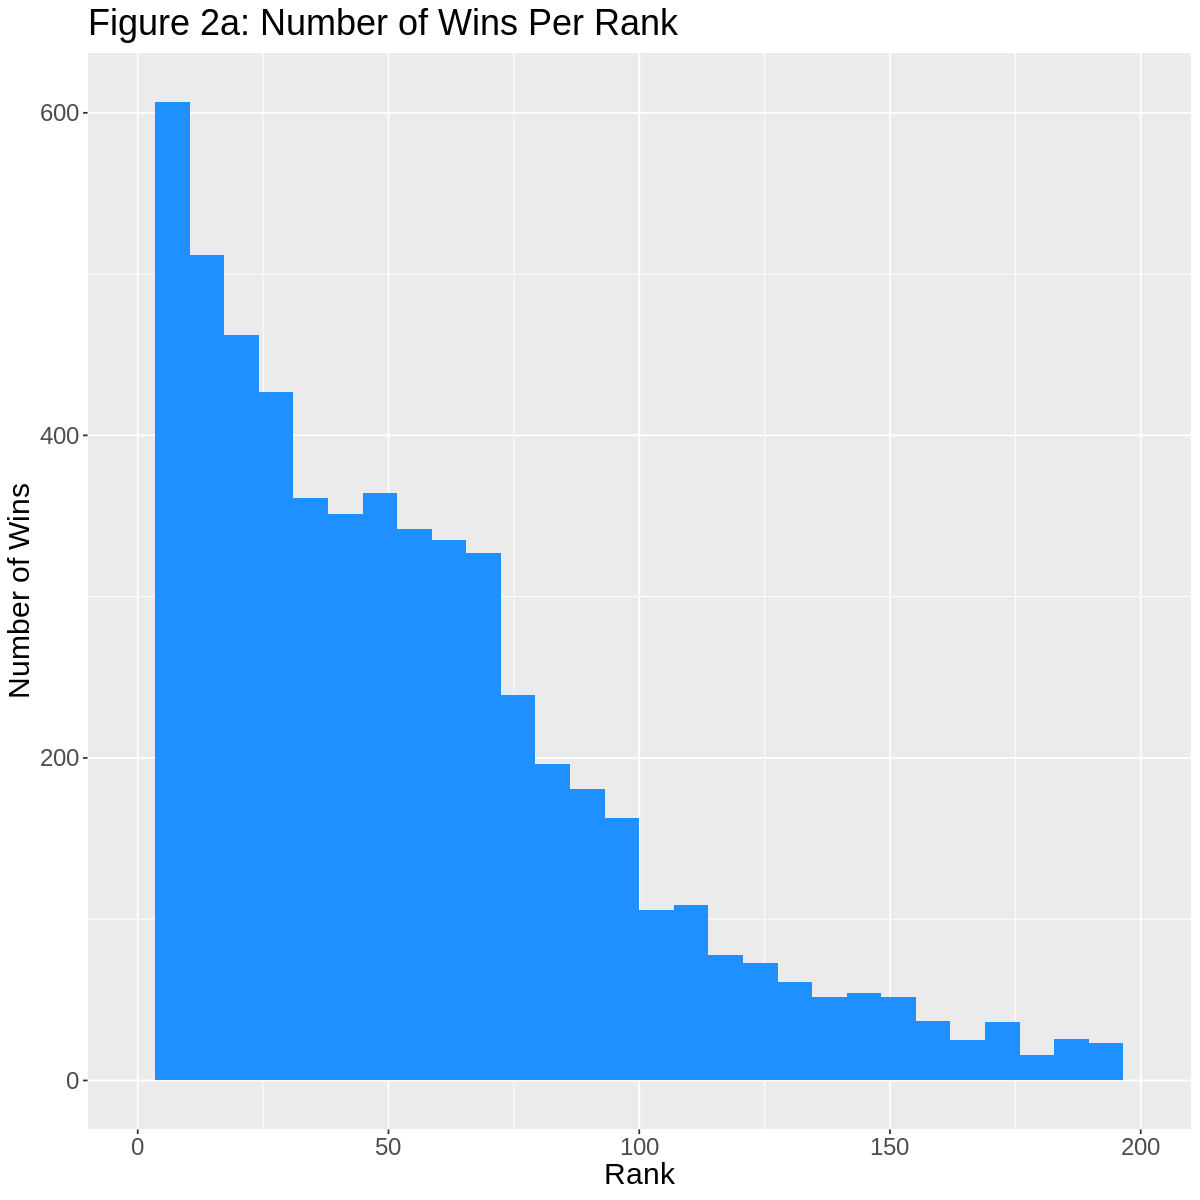

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


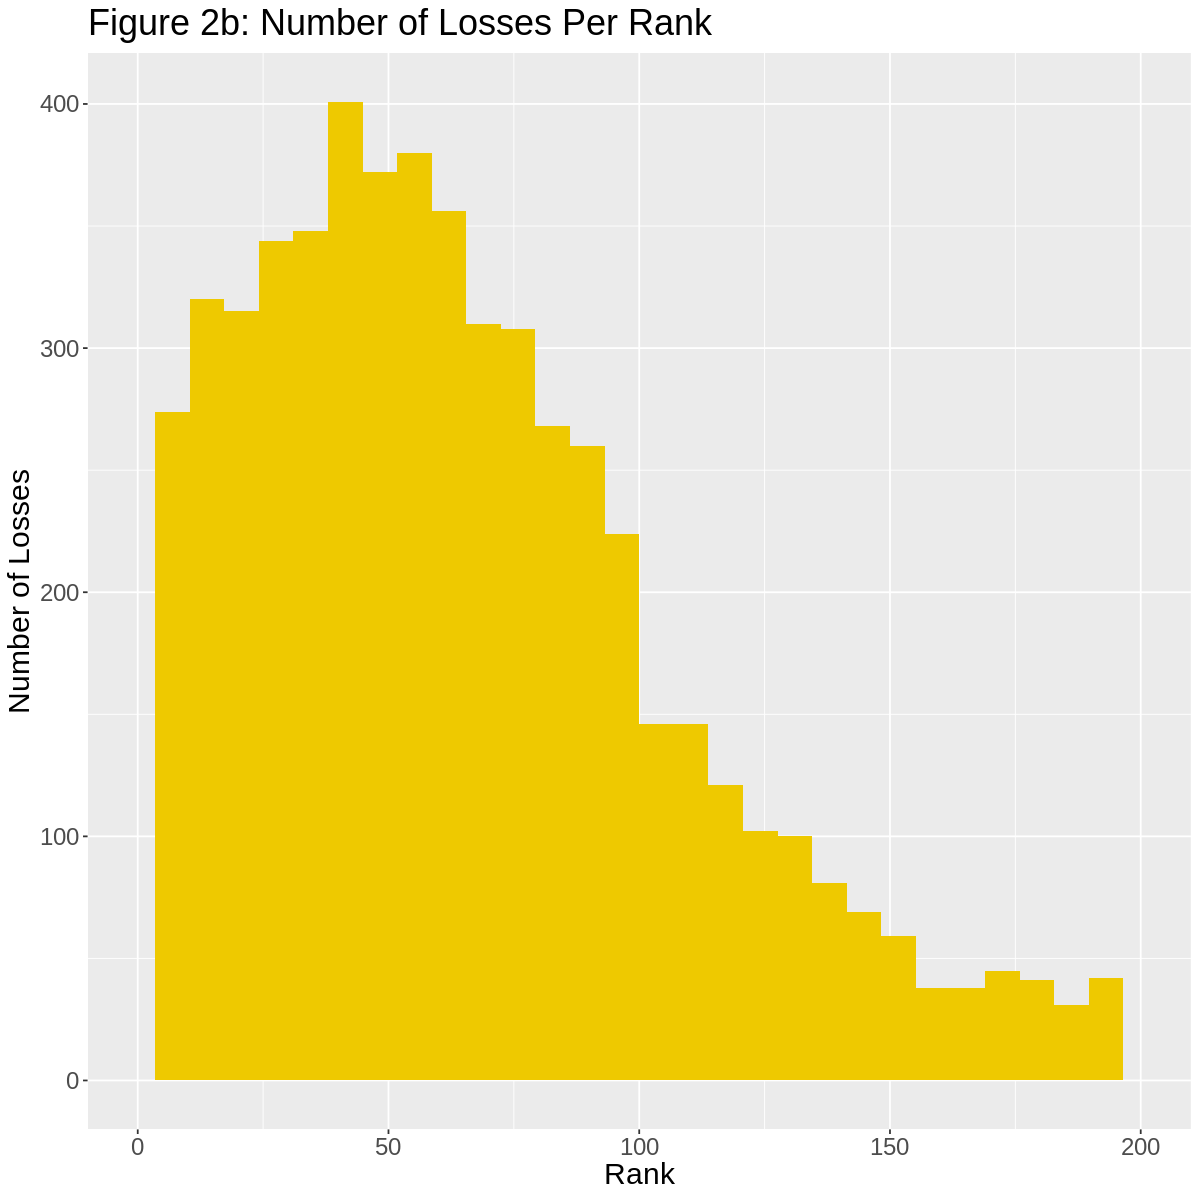

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


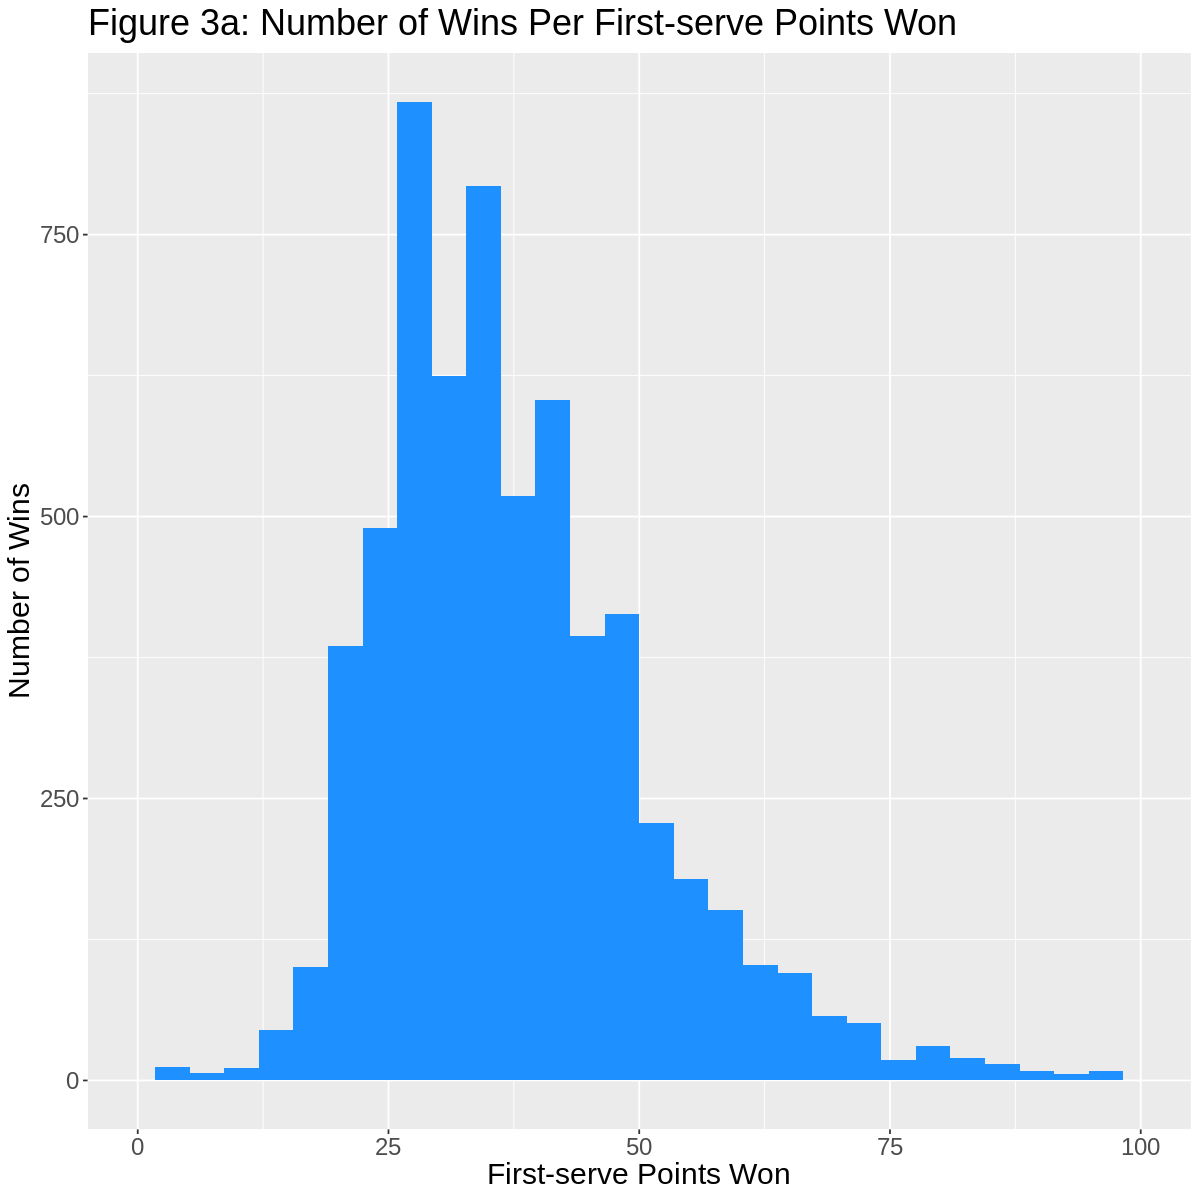

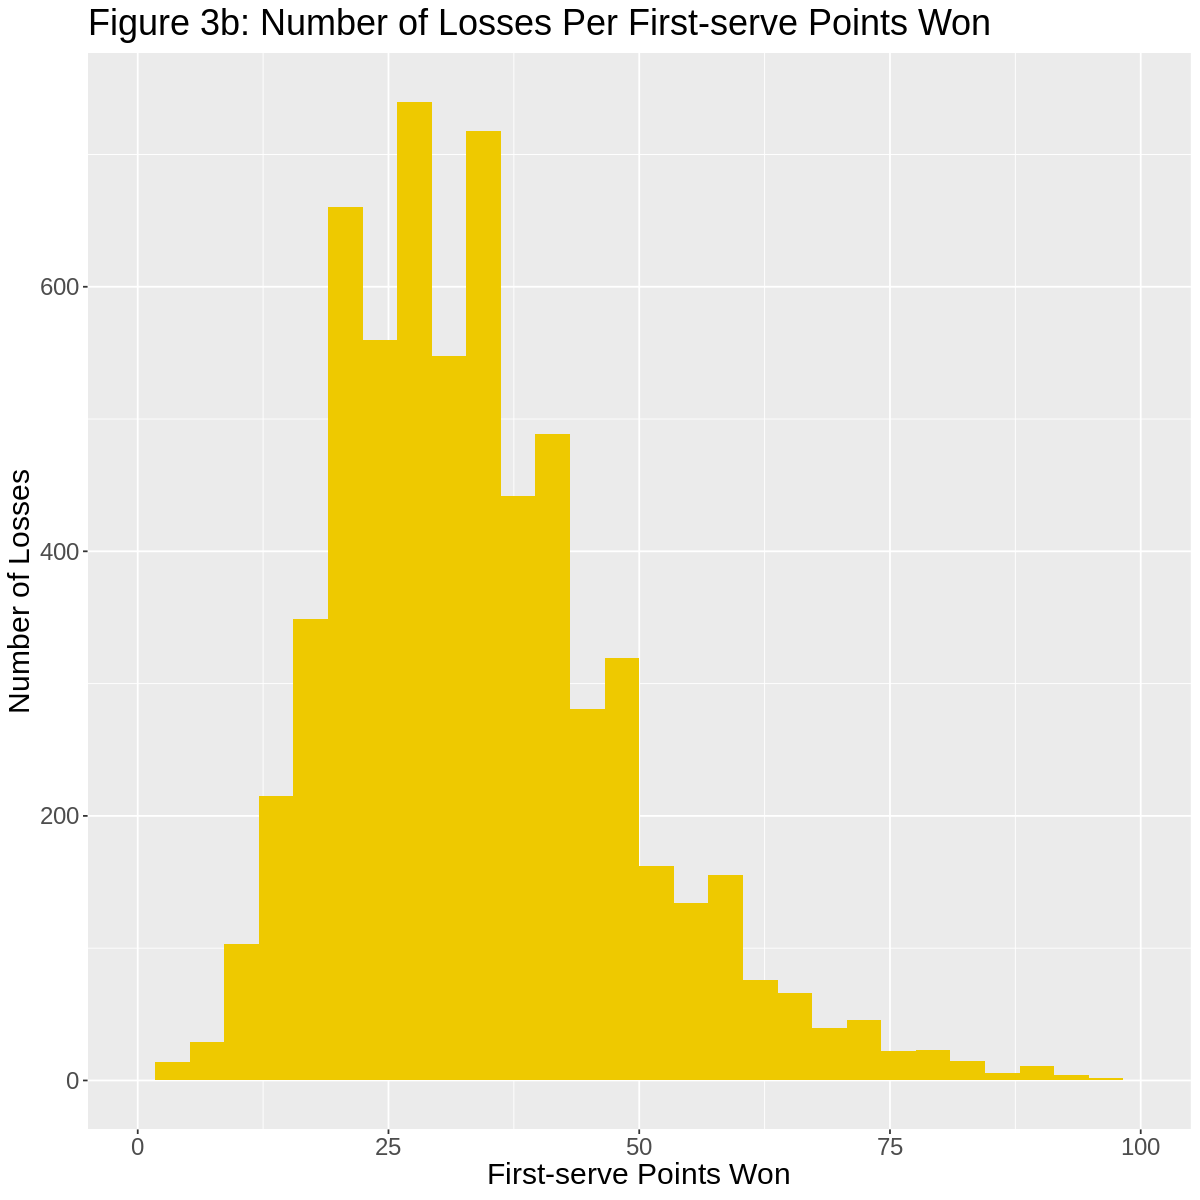

In [38]:
# Visualization of dataset - Code

options(repr.plot.height = 10, repr.plot.width = 10)

# Predictor 1 (Age) vs Result

atp_train_wins <- filter(atp_train, result == "win")

wins_per_age <- ggplot(atp_train_wins, aes(x = age)) +
                   geom_histogram(fill = "dodgerblue") +
                   labs(x = "Age (years)", y = "Number of Wins") +
                   ggtitle("Figure 1a: Number of Wins Per Age") +
                   theme(text = element_text(size = 18))
                   
wins_per_age

atp_train_losses <- filter(atp_train, result == "lose")


losses_per_age <-  ggplot(atp_train_losses, aes(x = age)) +
                   geom_histogram(fill = "gold2") +
                   labs(x = "Age (years)", y = "Number of Losses") +
                   ggtitle("Figure 1b: Number of Losses Per Age") +
                   theme(text = element_text(size = 18))

losses_per_age


# Predictor 2 (Rank) vs Result

wins_per_rank <- ggplot(atp_train_wins, aes(x = rank)) +
                   geom_histogram(fill = "dodgerblue") +
                   labs(x = "Rank", y = "Number of Wins") +
                   xlim(0,200) +
                   ggtitle("Figure 2a: Number of Wins Per Rank") +
                   theme(text = element_text(size = 18))
                   
wins_per_rank


losses_per_age <-  ggplot(atp_train_losses, aes(x = rank)) +
                   geom_histogram(fill = "gold2") +
                   labs(x = "Rank", y = "Number of Losses") +
                   xlim(0,200) +
                   ggtitle("Figure 2b: Number of Losses Per Rank") +
                   theme(text = element_text(size = 18))               

losses_per_age


# Predictor 3 (First-serve points Won) vs Result

wins_per_1stwon <- ggplot(atp_train_wins, aes(x = first_svpt_won)) +
                   geom_histogram(fill = "dodgerblue") +
                   labs(x = "First-serve Points Won", y = "Number of Wins") +
                   xlim(0,100) +
                   ggtitle("Figure 3a: Number of Wins Per First-serve Points Won") +
                   theme(text = element_text(size = 18))

wins_per_1stwon


losses_per_1stwon <- ggplot(atp_train_losses, aes(x = first_svpt_won)) +
                   geom_histogram(fill = "gold2") +
                   labs(x = "First-serve Points Won", y = "Number of Losses") +
                   xlim(0,100) +
                   ggtitle("Figure 3b: Number of Losses Per First-serve Points Won") +
                   theme(text = element_text(size = 18))

losses_per_1stwon


In [39]:
atp_vfold <- vfold_cv(atp_train, v = 10, strata = result)

atp_recipe <- recipe(result ~ age + rank + first_svpt_won, data = atp_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


In [48]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(atp_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = atp_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5323429,10,0.005485336,Preprocessor1_Model01
6,accuracy,binary,0.5662108,10,0.003661443,Preprocessor1_Model02
11,accuracy,binary,0.5787045,10,0.002893033,Preprocessor1_Model03
16,accuracy,binary,0.5836681,10,0.003353874,Preprocessor1_Model04
21,accuracy,binary,0.5864703,10,0.003828694,Preprocessor1_Model05
26,accuracy,binary,0.5877497,10,0.003015141,Preprocessor1_Model06
31,accuracy,binary,0.5857463,10,0.004406910,Preprocessor1_Model07
36,accuracy,binary,0.5879881,10,0.004305863,Preprocessor1_Model08
41,accuracy,binary,0.5883085,10,0.003502423,Preprocessor1_Model09


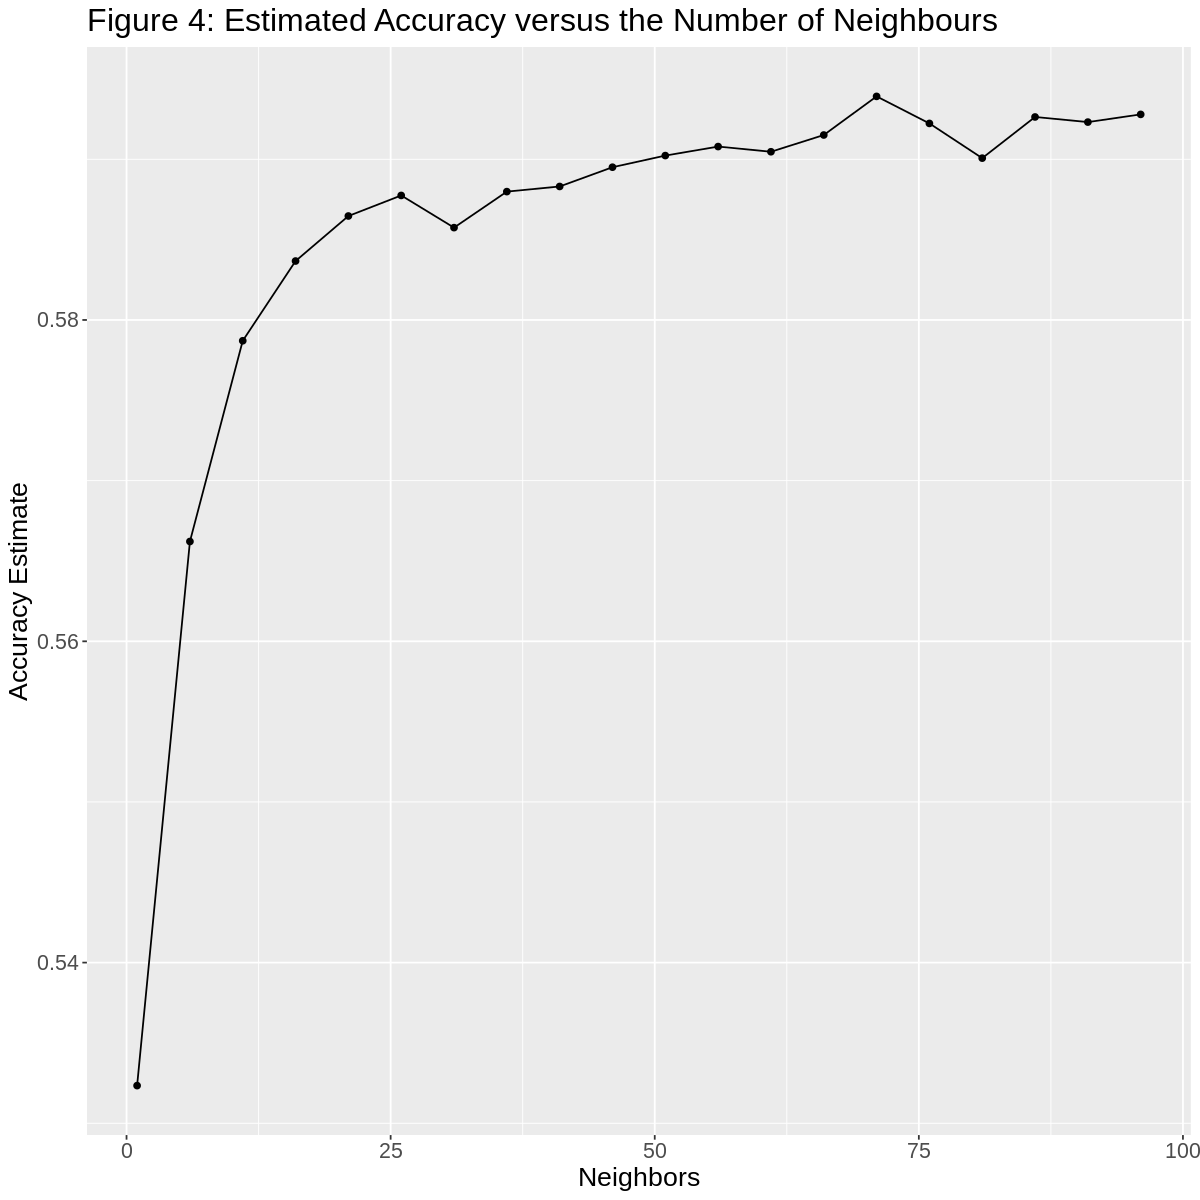

In [51]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Figure 4: Estimated Accuracy versus the Number of Neighbours") +
  theme(text = element_text(size = 16))

accuracy_vs_k

In [60]:
atp_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 71) |>
            set_engine("kknn") |>
            set_mode("classification")

atp_fit <- workflow() |>
           add_recipe(atp_recipe) |>
           add_model(atp_spec) |>
           fit(data = atp_train)


In [56]:
atp_predictions <- predict(atp_fit, atp_test) |>
     bind_cols(atp_test)

atp_metrics <- atp_predictions |>
     metrics(truth = result, estimate = .pred_class)

atp_predictions

atp_metrics

.pred_class,result,age,rank,first_svpt_won
<fct>,<fct>,<dbl>,<dbl>,<dbl>
win,win,22.7,79,26
win,win,34.9,39,42
win,win,26.0,3,30
lose,win,27.0,5,18
win,win,26.0,3,50
win,win,32.9,98,51
win,win,31.7,96,28
lose,win,32.8,86,20
win,win,28.7,14,26


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.598463
kap,binary,0.196926


In [57]:
atp_conf_mat <- atp_predictions |>
     conf_mat(truth = result, estimate = .pred_class)

atp_conf_mat

          Truth
Prediction  win lose
      win  1367  957
      lose  715 1125

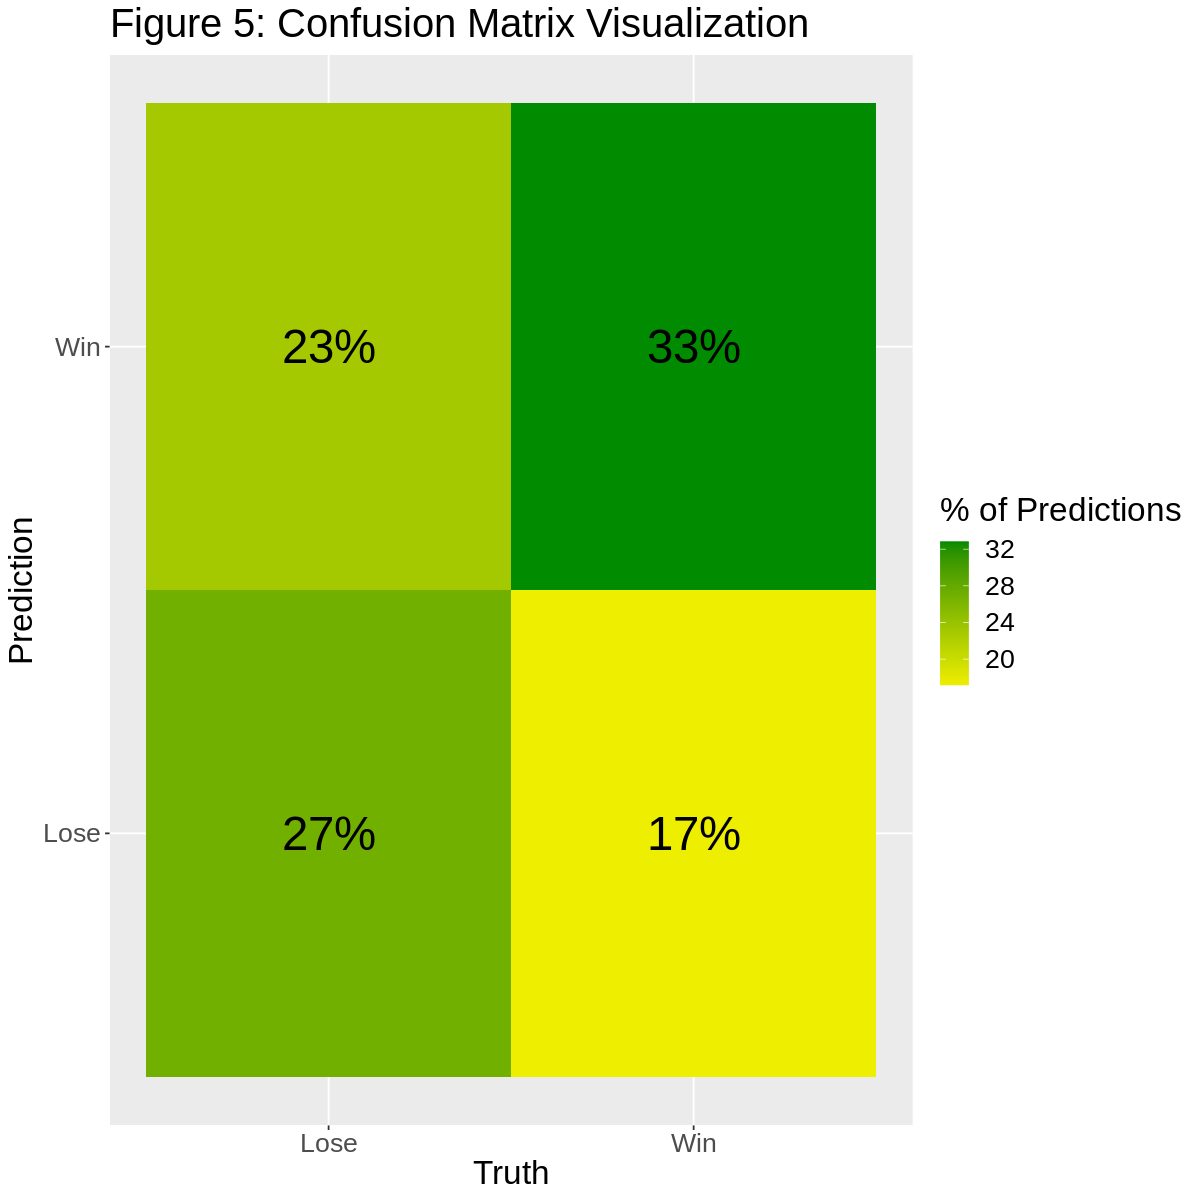

In [59]:
Prediction <- as.factor(c("Win", "Lose", "Win", "Lose"))
Truth <- as.factor(c("Win", "Win","Lose", "Lose"))
outcome <- c((1367/4164)*100, (715/4164) * 100, (957/4164) * 100, (1125/4164) * 100)

conf_mat_data <- as_tibble(Truth, Prediction, outcome)


ggplot(data = conf_mat_data, mapping = aes(x = Truth, y = Prediction)) +
geom_tile(aes(fill = outcome)) +
scale_fill_gradient(low = "yellow2", high = "green4") +
geom_text(aes(label = str_c(round(outcome), "%")), size = 10) +
ggtitle("Figure 5: Confusion Matrix Visualization") +
labs(fill = "% of Predictions") +
theme(text = element_text(size = 20))


## Discussion

## References

United States Tennis Association. (n.d.). Scoring Points & Tennis Sets. USTA. Retrieved April 10, 2023, from https://www.usta.com/en/home/improve/tips-and-instruction/national/tennis-scoring-rules.html